#### ML : K-Mean clustering

พัชรพล อ่วมโอฬาร 6210422018

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from operator import itemgetter
import seaborn as sns

In [2]:
from scipy.spatial.distance import cdist

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
def PCA_Converter(df_data):
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(df_data)
    pca_join = pd.DataFrame(data=pca_fit, columns=['PCA1','PCA2'])
    return pca_join

In [5]:
def convert_stdZ(data, headers):
    df_std = StandardScaler().fit_transform(data)
    df_ret_std = pd.DataFrame(df_std, columns=headers)
    return df_ret_std

In [6]:
def convert_withOlddata_stdZ(oldData, newData, headers):
    df_inv_std = StandardScaler().fit(oldData)
    df_std = df_inv_std.transform(newData)
    df_ret_std = pd.DataFrame(df_std, columns=headers)
    return df_ret_std

### Open datafile & create dataframe

In [7]:
# IMPORT FROM LOCAL FILE (Downloaded form webSite)
pathStr = 'source'
filename = pathStr+'\wine.data'

In [8]:
col_name = ['CLASS','ALC','MLA','ASH','AOA','MAG','PHE','FLA','NFL','PRO','COL','HUE','ODW','PRL']

In [9]:
df_wine = pd.read_csv(filename, sep=',', lineterminator='\n', header=None, names=col_name)

In [10]:
df_wine.head()

,CLASS,ALC,MLA,ASH,AOA,MAG,PHE,FLA,NFL,PRO,COL,HUE,ODW,PRL
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )<br>
<ol>
    <li>ALC = Alcohol</li>
    <li>MLA = Malic acid</li>
    <li>ASH	= Ash</li>
    <li>AOA = Alcalinity of ash</li>
    <li>MAG = Magnesium</li>
    <li>PHE = Total phenols</li>
    <li>FLA = Flavanoids</li>
    <li>NFL = Nonflavanoid phenols</li>
    <li>PRO = Proanthocyanins</li>
    <li>COL = Color intensity</li>
    <li>HUE = Hue</li>
    <li>ODW = OD280/OD315 of diluted wines</li>
    <li>PRL = Proline</li>
</ol>

ทำ Correlation matrix

In [11]:
df_corr = pd.DataFrame(df_wine.corr())

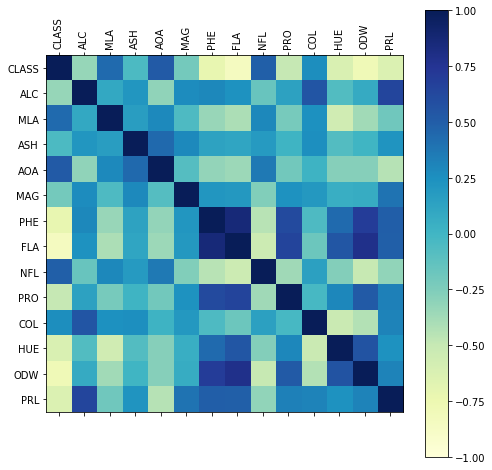

In [12]:
plt.figure(figsize=(8,8))
plt.matshow(df_corr,fignum=1)
plt.xticks(range(len(df_corr.columns)), labels=df_corr.columns, rotation='vertical')
plt.yticks(range(len(df_corr.columns)), labels=df_corr.columns)

plt.imshow(df_corr, cmap=plt.cm.get_cmap('YlGnBu', 360))
plt.colorbar()
plt.clim(-1, 1);
plt.show()

In [13]:
corr_cal = df_corr.iloc[0]

คัดเลือก Feature ที่เป็นบวกกับ CLASS

In [14]:
corr_cal

CLASS    1.000000
ALC     -0.328222
MLA      0.437776
ASH     -0.049643
AOA      0.517859
MAG     -0.209179
PHE     -0.719163
FLA     -0.847498
NFL      0.489109
PRO     -0.499130
COL      0.265668
HUE     -0.617369
ODW     -0.788230
PRL     -0.633717
Name: CLASS, dtype: float64

In [15]:
df_wine = df_wine[['CLASS','MLA','AOA','NFL','COL']]

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


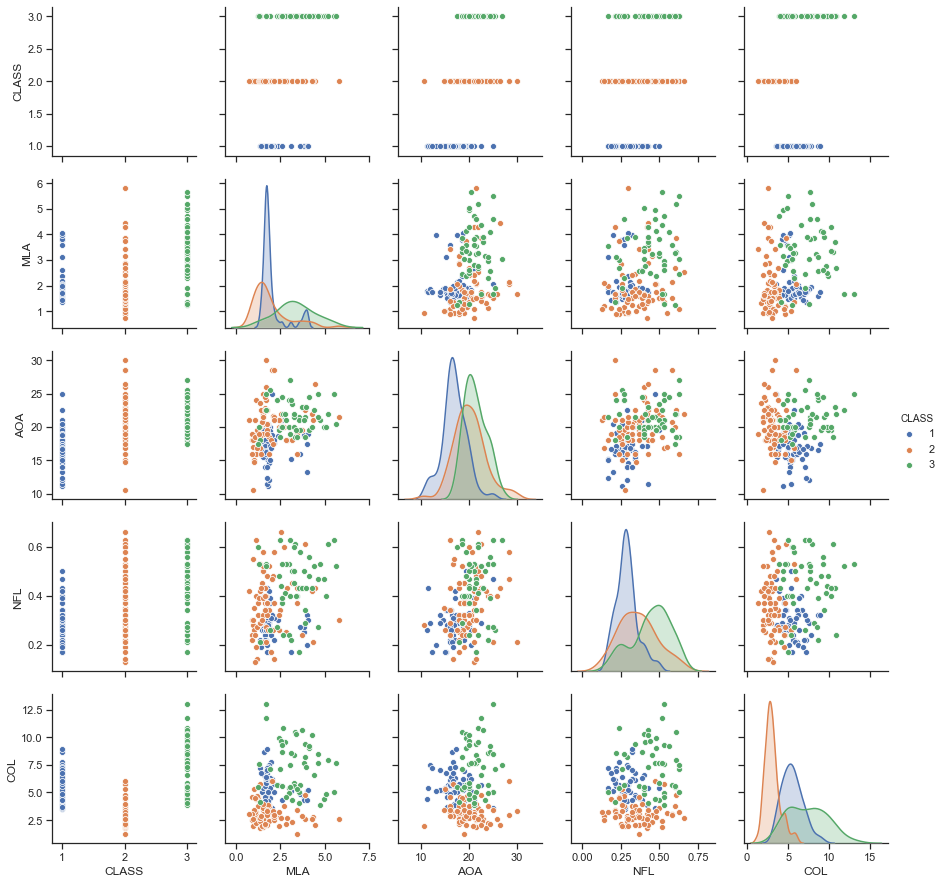

In [16]:
sns.set(style="ticks")
sns.pairplot(df_wine, hue="CLASS")

### Data preprocessing

In [17]:
target = df_wine['CLASS']

In [18]:
data = df_wine.drop('CLASS', axis=1)

In [19]:
cols = list(data.columns)

Standardize the data

In [20]:
df_wine_std = convert_stdZ(data, cols)

### Automate finding optimal k<br>
ใช้ Silhouette Score หาค่า k ที่ทำให้การแบ่ง cluster ทำได้ดีที่สุด

In [21]:
sil = []
K_SIL = range(2, 11)

# Loop หา Optimal K
for k in K_SIL:
    kmeans = KMeans(n_clusters=k).fit(df_wine_std)
    labels = kmeans.labels_
    sil.append([k,silhouette_score(df_wine_std, labels, metric='euclidean')])

เก็บค่าลงตัวแปร max_k

In [22]:
sil_value = itemgetter(1)
sil_map = list(map(sil_value, sil))
sil_sort = sorted(sil, key=sil_value)
max_k = sil_sort[-1][0]

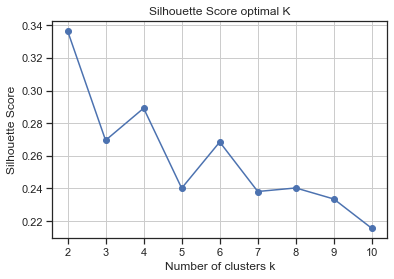

In [23]:
plt.plot(K_SIL, sil_map, 'o-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score optimal K')
plt.grid()
plt.show()

In [24]:
print(f'การหาจำนวน Optimal Cluster (k) พบว่าค่า k ที่เหมาะสมเท่ากับ = {max_k}')

การหาจำนวน Optimal Cluster (k) พบว่าค่า k ที่เหมาะสมเท่ากับ = 2


### Build model<br>

In [25]:
model = KMeans(n_clusters=max_k, init='k-means++')
model.fit(df_wine_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
km = model.fit_predict(df_wine_std)

In [27]:
df_wine_std['PRED_CLASS'] = km

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


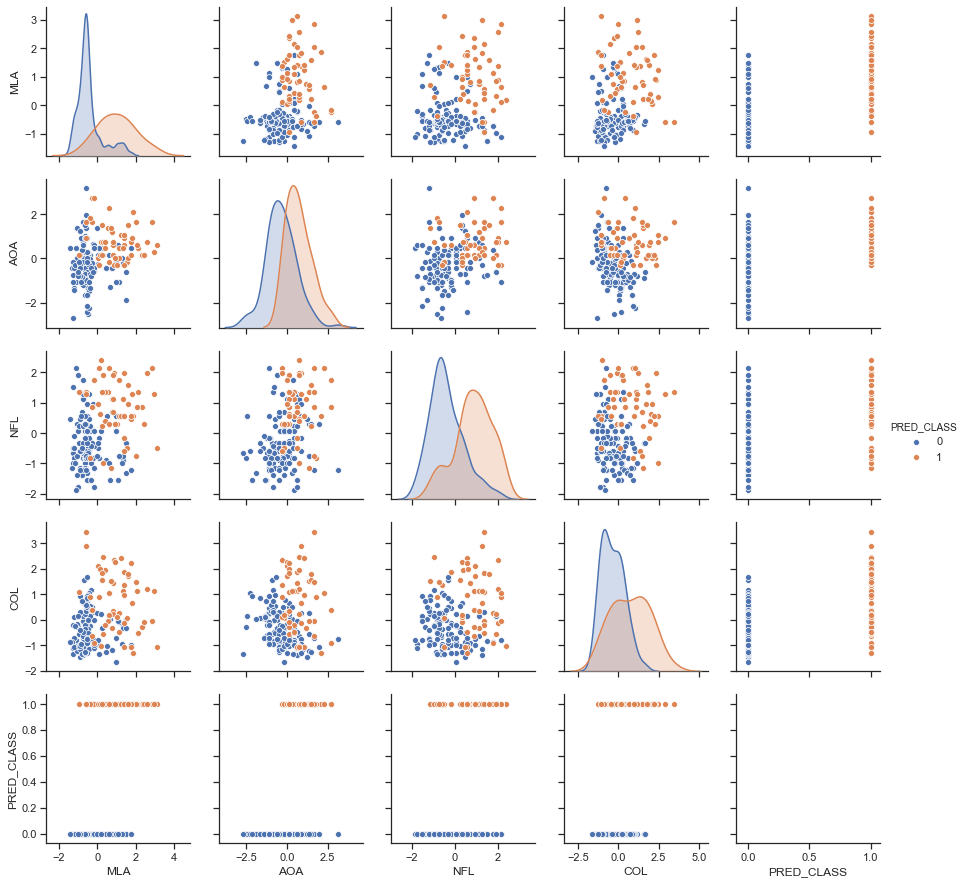

In [28]:
sns.set(style="ticks")
sns.pairplot(df_wine_std, hue="PRED_CLASS")

<ol>
    <li>MLA = Malic acid</li>
    <li>AOA = Alcalinity of ash</li>
    <li>NFL = Nonflavanoid phenols</li>
    <li>COL = Color intensity</li>
</ol>